In [1]:
import os
from maze_env import Maze
from Double_dqn import DRL
import time
import numpy as np
import tensorflow as tf

In [2]:
# if __name__ == "__main__":
env = Maze()

print('{0}x{1}, act_space = {2}'.format(env.MAZE_Limit[0],env.MAZE_Limit[1], len(env.action_space)))
# env.bind('<KeyPress>', onKeyPress)
# env.mainloop()
sess = tf.compat.v1.Session()

with tf.compat.v1.variable_scope('Double_DQN'):
    double_DRL = DRL(env, double_q = True, sess = sess)
    
with tf.compat.v1.variable_scope('DQN'):
    DRL = DRL(env, double_q = False, sess = sess)

sess.run(tf.compat.v1.global_variables_initializer())

4x4, act_space = 4
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
double_DRL.QDN.iteration(1000)
DRL.QDN.iteration(1000)
# end of game
env.destroy()
sess.close()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:08<00:00,  4.03it/s]


In [4]:
Avalue = np.squeeze(np.transpose(np.array(double_DRL.QDN.Avalue), (2, 0, 1)))
print(Avalue)
print("[Max] Action to State-value\n",np.max(Avalue,axis=0).reshape(env.MAZE_Limit[1],env.MAZE_Limit[0]))
print("[Max] Best action in each state\n",np.argmax(Avalue,axis=0).reshape(env.MAZE_Limit[1],env.MAZE_Limit[0]))

[[  2.4231558   -1.896593    -0.4817859    2.3795257    8.615189
   -0.28226054   0.22332346   2.9243808    2.1890695   -3.2713137
   -3.660046    -0.47623193  -4.2431254   -9.627697   -10.327653
   -6.7611995 ]
 [ -0.24360356  -0.54604757   0.4228355    0.01651683  -2.665031
   -1.4486493   -0.76057494  -1.160529    -1.4804415    0.32218555
    0.98531425  -1.8708451   -0.2952116    1.5527097    6.199454
    3.2436218 ]
 [ -1.1868632   -3.3510904   -5.02237     -3.361093    -0.37753698
   -1.6576512   -0.26051366   1.516395    -1.5160418   -2.090776
    0.21666801   7.738871    -2.6522455   -3.2035518   -2.3073142
    5.117987  ]
 [  4.988693     8.399002     5.393522     2.490921    -1.4054185
   -0.03099048  -0.6793066   -3.4022603   -1.0684849   -0.7976154
   -3.061895    -5.5449824   -0.7258364   -0.48896825  -2.3532162
   -5.0565352 ]]
[Max] Action to State-value
 [[ 4.988693    8.399002    5.393522    2.490921  ]
 [ 8.615189   -0.03099048  0.22332346  2.9243808 ]
 [ 2.1890695   

In [5]:
Avalue = np.squeeze(np.transpose(np.array(DRL.QDN.Avalue), (2, 0, 1)))
print(Avalue)
print("[Max] Action to State-value\n",np.max(Avalue,axis=0).reshape(env.MAZE_Limit[1],env.MAZE_Limit[0]))
print("[Max] Best action in each state\n",np.argmax(Avalue,axis=0).reshape(env.MAZE_Limit[1],env.MAZE_Limit[0]))

[[ 4.5068283  -0.8111954  -0.373003    3.2897472   8.787573   -0.2066164
  -0.08186436  4.5021095   2.3742347  -0.86694217  0.1962061   2.7282686
  -4.1154094  -3.8905911   0.28394747  2.6492834 ]
 [ 3.1182818   0.60044014 -2.2076342  -3.0484695  -1.3098739  -0.99754226
  -1.8977329  -1.80818    -0.86790764  0.6865424   1.8347489  -0.60844576
  -0.39195362  3.4204128  10.6214285   8.002537  ]
 [-0.74700356 -3.029399   -0.75690687  2.4196973   0.5064703  -0.03823301
   1.4467493   5.182623   -0.7110144  -1.5470047   1.5712744   8.987282
  -1.9094988  -1.6825652  -0.75491154  5.0053816 ]
 [ 2.4329185   8.04588     2.2613702  -3.0344262  -1.5528561  -0.35120487
  -0.0227977  -4.737142   -0.2265433   0.01716805 -0.40413964 -4.2565
   1.1479369   2.037928    1.7410909  -0.6169976 ]]
[Max] Action to State-value
 [[ 4.5068283   8.04588     2.2613702   3.2897472 ]
 [ 8.787573   -0.03823301  1.4467493   5.182623  ]
 [ 2.3742347   0.6865424   1.8347489   8.987282  ]
 [ 1.1479369   3.4204128  10.

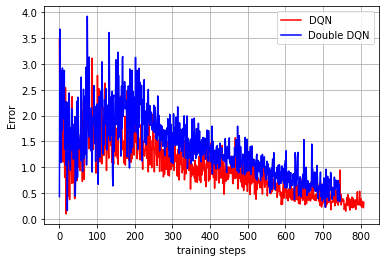

In [6]:
import matplotlib.pyplot as plt
plt.plot(np.array(DRL.QDN.cost_his), c='r', label='DQN')
plt.plot(np.array(double_DRL.QDN.cost_his), c='b', label='Double DQN')
plt.legend(loc='best')
plt.ylabel('Error')
plt.xlabel('training steps')
plt.grid()
plt.show()

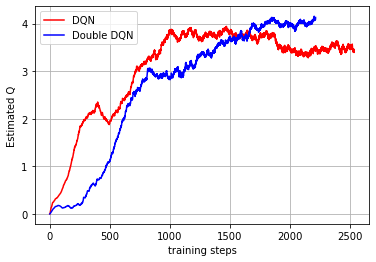

In [7]:
import matplotlib.pyplot as plt
plt.plot(np.array(DRL.QDN.q), c='r', label='DQN')
plt.plot(np.array(double_DRL.QDN.q), c='b', label='Double DQN')
plt.legend(loc='best')
plt.ylabel('Estimated Q')
plt.xlabel('training steps')
plt.grid()
plt.show()